In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv('hearing_test.csv')

In [140]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


# EDA

In [141]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [142]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

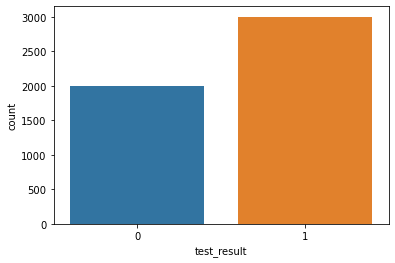

In [143]:
sns.countplot(data=df,x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

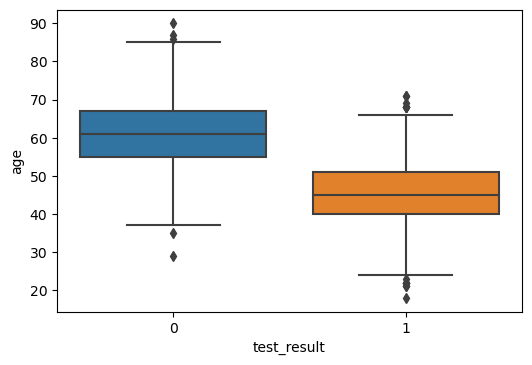

In [144]:
plt.figure(dpi=100)
sns.boxplot(data=df,x='test_result',y='age')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

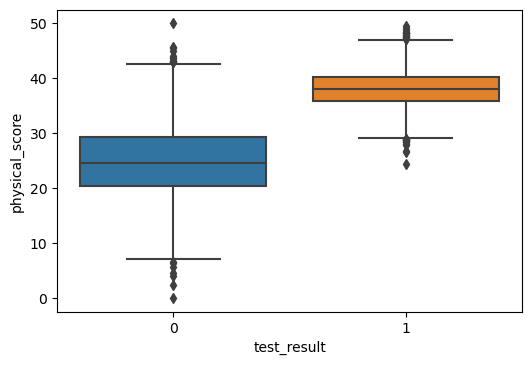

In [145]:
plt.figure(dpi=100)
sns.boxplot(data=df,x='test_result',y='physical_score')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

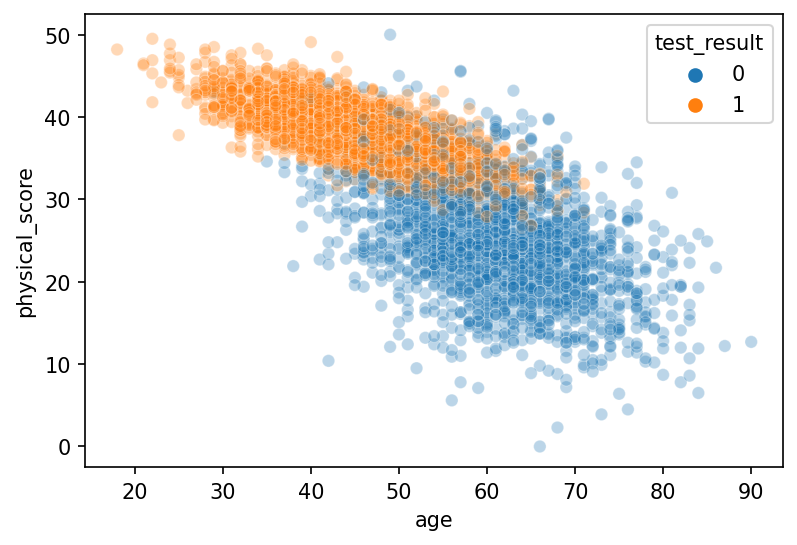

In [146]:
plt.figure(dpi=150)
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.3,)

<Figure size 2400x750 with 0 Axes>

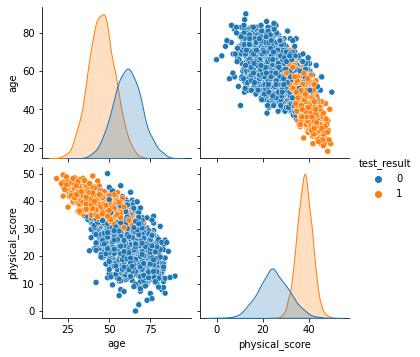

In [147]:
plt.figure(dpi=150
          ,figsize=(16,5))
sns.pairplot(data=df,hue='test_result')

<AxesSubplot:>

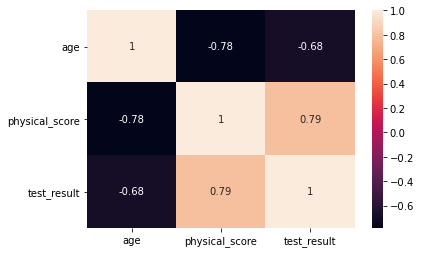

In [148]:
sns.heatmap(data=df.corr(),annot=True)

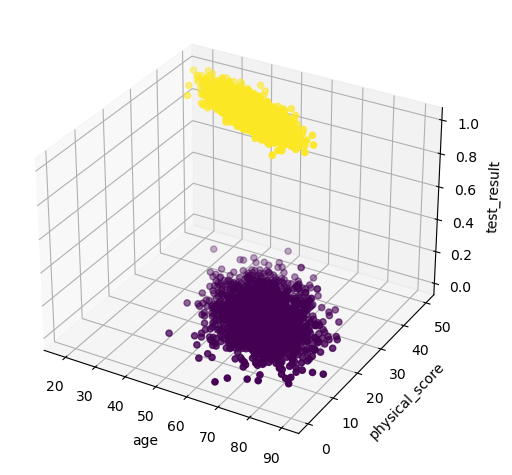

In [149]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10,6),dpi=100)
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

ax.set_xlabel('age')
ax.set_ylabel('physical_score')
ax.set_zlabel('test_result')

plt.show()


# Model Training

In [150]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [151]:
X = df.drop('test_result',axis=1)
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [152]:
y= df['test_result']
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=101)

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
scaler = StandardScaler()

In [157]:
scaler.fit(X_train)

StandardScaler()

In [158]:
X_train = scaler.transform(X_train)

In [159]:
X_test = scaler.transform(X_test)

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
model = LogisticRegression()

In [162]:
model.fit(X_train,y_train)

LogisticRegression()

In [163]:
y_pred = model.predict(X_test)

In [164]:
model.coef_

array([[-0.94953524,  3.45991194]])

In [165]:
y_pred = model.predict_log_proba(X_test)

In [166]:
y_pred

array([[-3.73624645e+00, -2.41322882e-02],
       [-3.61473437e+00, -2.72931691e-02],
       [-1.08646395e-02, -4.52766925e+00],
       [-6.26186243e+00, -1.90951150e-03],
       [-2.53048651e-02, -3.68938436e+00],
       [-1.04014032e-02, -4.57101075e+00],
       [-2.60338392e+00, -7.69055235e-02],
       [-4.06900821e+00, -1.72421290e-02],
       [-2.93827944e-03, -5.83139987e+00],
       [-3.40966832e+00, -3.36107265e-02],
       [-2.48766737e+00, -8.67607797e-02],
       [-4.61233045e+00, -9.97827083e-03],
       [-4.94911900e+00, -7.11490318e-03],
       [-6.80257902e-02, -2.72168847e+00],
       [-9.05680479e+00, -1.16601725e-04],
       [-2.71976229e+00, -6.81615190e-02],
       [-1.09328401e-02, -4.52144561e+00],
       [-5.87795246e+00, -2.80444235e-03],
       [-7.48950309e+00, -5.59076878e-04],
       [-3.48276726e-03, -5.66166899e+00],
       [-1.25838703e-01, -2.13501396e+00],
       [-2.03232536e+00, -1.40447221e-01],
       [-6.05783489e-01, -7.88880302e-01],
       [-3.

In [167]:
y_pred = model.predict_proba(X_test)

In [168]:
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [169]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [170]:
model.coef_


array([[-0.94953524,  3.45991194]])

In [171]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [172]:
y_pred = model.predict(X_test)

In [173]:
accuracy_score(y_test,y_pred)

0.93

In [174]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [175]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [176]:
len(y_test)

500

In [177]:
from sklearn.metrics import plot_confusion_matrix

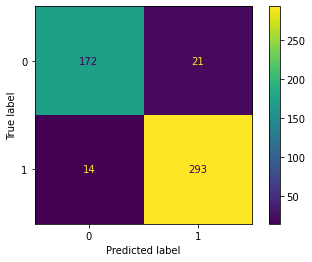

In [181]:
plot_confusion_matrix(model,X_test,y_test)

In [183]:
# if precision and accuracy are almost similar than you have some what balance data
# macro avg ==mean
# weighted per class
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [184]:
from sklearn.metrics import precision_score,recall_score

In [185]:
precision_score(y_test,y_pred)

0.9331210191082803

In [186]:
recall_score(y_test,y_pred)

0.9543973941368078

In [187]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

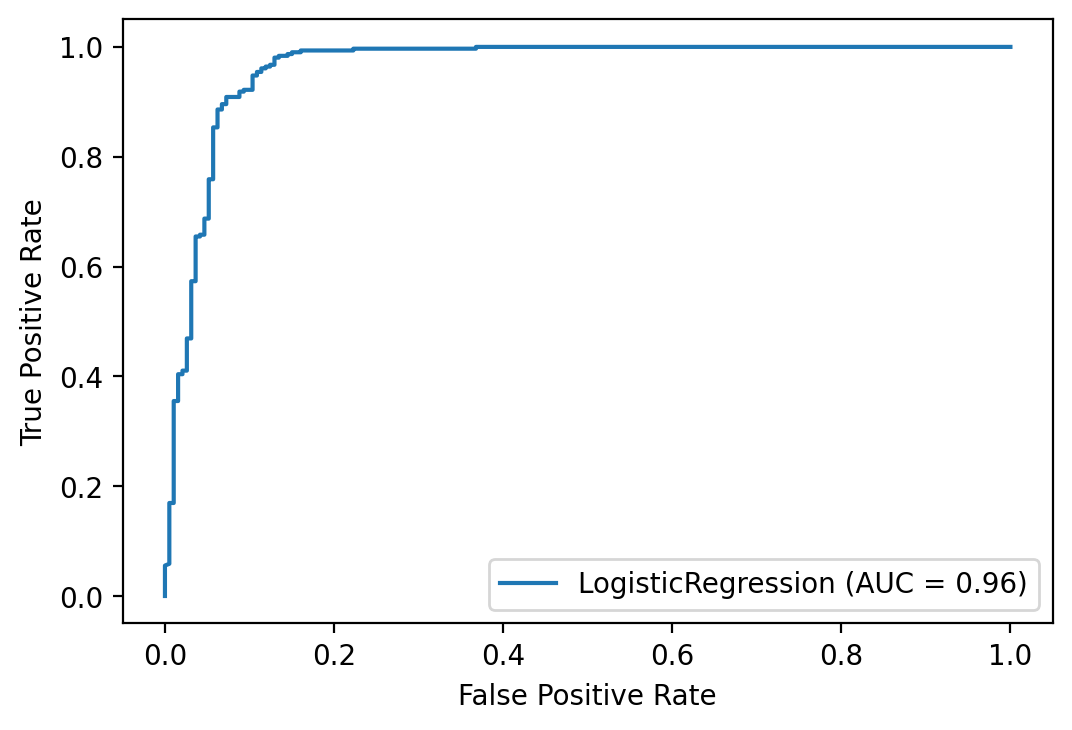

In [190]:
fig,ax = plt.subplots(dpi=200)
plot_roc_curve(model,X_test,y_test,ax=ax,)

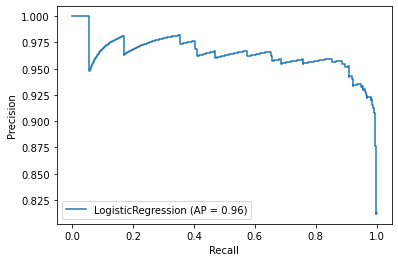

In [191]:
plot_precision_recall_curve(model,X_test,y_test)